<a href="https://colab.research.google.com/github/zlibutmatthew/Stock-Prediction-SVM/blob/master/SVM_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler

In [4]:
#Get the stock info and store into a dataframe
df = web.DataReader('AAPL', data_source='yahoo', start='2008-01-01', end='2019-12-31')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2008-01-02,7.152143,6.876786,7.116786,6.958571,1.079179e+09,6.013175
2008-01-03,7.049643,6.881786,6.978929,6.961786,8.420664e+08,6.015953
2008-01-04,6.892857,6.388928,6.837500,6.430357,1.455832e+09,5.556723
2008-01-07,6.557143,6.079643,6.473214,6.344285,2.072193e+09,5.482346
2008-01-08,6.516428,6.100000,6.433571,6.116071,1.523816e+09,5.285137
...,...,...,...,...,...,...
2019-12-24,71.222504,70.730003,71.172501,71.067497,4.847880e+07,70.580566
2019-12-26,72.495003,71.175003,71.205002,72.477501,9.312120e+07,71.980911
2019-12-27,73.492500,72.029999,72.779999,72.449997,1.462660e+08,71.953598


In [5]:
df.shape

(3021, 6)

In [6]:
df_nas = web.DataReader('^IXIC', data_source='yahoo', start='2008-01-01', end='2019-12-31')
df_nas

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2008-01-02,2661.500000,2597.810059,2653.909912,2609.629883,2076690000,2609.629883
2008-01-03,2624.270020,2592.179932,2611.959961,2602.679932,1970200000,2602.679932
2008-01-04,2571.080078,2502.679932,2571.080078,2504.649902,2516310000,2504.649902
2008-01-07,2521.620117,2471.229980,2514.149902,2499.459961,2600100000,2499.459961
2008-01-08,2527.419922,2440.510010,2506.969971,2440.510010,2566480000,2440.510010
...,...,...,...,...,...,...
2019-12-24,8957.120117,8934.360352,8955.009766,8952.879883,1014520000,8952.879883
2019-12-26,9022.459961,8968.459961,8970.209961,9022.389648,1634920000,9022.389648
2019-12-27,9052.000000,8987.320312,9049.469727,9006.620117,1832200000,9006.620117


In [7]:
df_nas.shape

(3021, 6)

In [8]:
df_dow = web.DataReader('^DJI', data_source='yahoo', start='2008-01-01', end='2019-12-31')
df_dow

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2008-01-02,13279.540039,12991.370117,13261.820312,13043.959961,239580000,13043.959961
2008-01-03,13137.929688,13023.559570,13044.120117,13056.719727,200620000,13056.719727
2008-01-04,13046.719727,12789.040039,13046.559570,12800.179688,304210000,12800.179688
2008-01-07,12884.150391,12733.839844,12801.150391,12827.490234,306700000,12827.490234
2008-01-08,12906.419922,12565.410156,12820.900391,12589.070312,322690000,12589.070312
...,...,...,...,...,...,...
2019-12-24,28576.800781,28503.210938,28572.570312,28515.449219,86150000,28515.449219
2019-12-26,28624.099609,28535.150391,28539.460938,28621.390625,155970000,28621.390625
2019-12-27,28701.660156,28608.980469,28675.339844,28645.259766,182280000,28645.259766


In [9]:
df_dow.shape

(3021, 6)

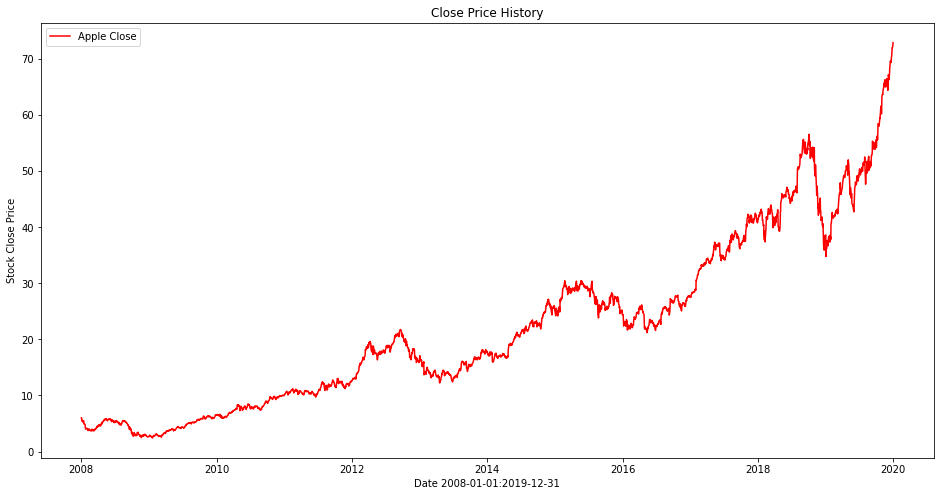

In [48]:
#Visualize the closing prince of the Apple stock.
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Adj Close'], 'r', label='Apple Close')
# plt.plot(df_nas['Close'], 'b', label='NASDAQ Close')
# plt.plot(df_dow['Close'], 'g', label='Dow Close')
plt.xlabel('Date 2008-01-01:2019-12-31')
plt.ylabel('Stock Close Price')
plt.legend()

In [49]:
appl_df= df['Adj Close']
appl = appl_df.values
appl

array([ 6.01317501,  6.01595306,  5.55672312, ..., 71.95359802,
       72.38065338, 72.90950012])

In [50]:
adj_close = pd.concat([df_nas['Adj Close'], df_dow['Adj Close']], axis=1)
adj_close = adj_close.values
adj_close

array([[ 2609.62988281, 13043.95996094],
       [ 2602.67993164, 13056.71972656],
       [ 2504.64990234, 12800.1796875 ],
       ...,
       [ 9006.62011719, 28645.25976562],
       [ 8945.99023438, 28462.140625  ],
       [ 8972.59960938, 28538.43945312]])

In [56]:
nas_dow_test = adj_close[:40,:]
nas_dow_test

array([[ 2609.62988281, 13043.95996094],
       [ 2602.67993164, 13056.71972656],
       [ 2504.64990234, 12800.1796875 ],
       [ 2499.45996094, 12827.49023438],
       [ 2440.51000977, 12589.0703125 ],
       [ 2474.55004883, 12735.30957031],
       [ 2488.52001953, 12853.08984375],
       [ 2439.93994141, 12606.29980469],
       [ 2478.30004883, 12778.15039062],
       [ 2417.59008789, 12501.11035156],
       [ 2394.59008789, 12466.16015625],
       [ 2346.89990234, 12159.20996094],
       [ 2340.02001953, 12099.29980469],
       [ 2292.27001953, 11971.19042969],
       [ 2316.40991211, 12270.16992188],
       [ 2360.91992188, 12378.61035156],
       [ 2326.19995117, 12207.16992188],
       [ 2349.90991211, 12383.88964844],
       [ 2358.06005859, 12480.29980469],
       [ 2349.        , 12442.83007812],
       [ 2389.86010742, 12650.36035156],
       [ 2413.36010742, 12743.19042969],
       [ 2382.85009766, 12635.16015625],
       [ 2309.57006836, 12265.12988281],
       [ 2278.75

In [76]:
appl_test = appl[:40]
appl_test

array([6.01317501, 6.01595306, 5.55672312, 5.48234558, 5.2851367 ,
       5.53666258, 5.49407387, 5.32957792, 5.51752758, 5.21693182,
       4.92682743, 4.96540499, 4.97991133, 4.80337811, 4.29199505,
       4.18490267, 4.01238346, 4.01238346, 4.05960369, 4.07935524,
       4.17749596, 4.12780857, 4.06299639, 3.99232316, 3.76517797,
       3.74172235, 3.87257767, 3.99510074, 3.85344338, 3.99355578,
       3.93368459, 3.84634519, 3.77073288, 3.82134819, 3.75098062,
       3.6867888 , 3.6954298 , 3.67722106, 3.79480624, 4.00929785])

In [73]:
day_count=[]
for i in range(1, len(appl)+1):
  day_count.append(i)
day_count[:10]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [78]:
#set up model
#linear kernel
lin_svr = SVR(kernel='linear', C=1000)
lin_svr.fit(nas_dow_test, appl_test)

# #polynomial kernel
poly_svr = SVR(kernel='poly', degree = 2)
poly_svr.fit(nas_dow_test, appl_test)

# #rbf kernel
rbf_svr = SVR(kernel='rbf', gamma=0.15)
rbf_svr.fit(nas_dow_test, appl_test)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.15,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
print('linear train',lin_svr.score(X_train, y_train))
print('linear test',lin_svr.score(X_test, y_test))

print('poly train', poly_svr.score(X_train, y_train))
print('poly test', poly_svr.score(X_test, y_test))

print('rbf train', rbf_svr.score(X_train, y_train))
print('rbf test',rbf_svr.score(X_test, y_test))

### Support Vector Regression

In [87]:
adj_close = pd.concat([df_nas['Adj Close'], df_dow['Adj Close']], axis=1)
adj_close = adj_close.values
adj_close

array([[ 2609.62988281, 13043.95996094],
       [ 2602.67993164, 13056.71972656],
       [ 2504.64990234, 12800.1796875 ],
       ...,
       [ 9006.62011719, 28645.25976562],
       [ 8945.99023438, 28462.140625  ],
       [ 8972.59960938, 28538.43945312]])

In [88]:
#creating a new dataframe with the close column
close_data = df.filter(['Adj Close'])
#convert to np array
close_df = close_data.values
# #number of rows to train the model on
# train_len = int(len(close_df)*.8)
# #train_len = 2416
close_df

array([[ 6.01317501],
       [ 6.01595306],
       [ 5.55672312],
       ...,
       [71.95359802],
       [72.38065338],
       [72.90950012]])

In [89]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(adj_close)
scaled_data

array([[0.17294727, 0.29400165],
       [0.17205094, 0.29457906],
       [0.15940802, 0.28296997],
       ...,
       [0.99796621, 1.        ],
       [0.99014678, 0.99171339],
       [0.99357859, 0.99516611]])

In [123]:
#create training dataset
X = scaled_data
y = close_df
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size=0.25,
                     random_state=1)

In [124]:
print(X_train.shape)
print(len(y_test))

(2265, 2)
756


In [125]:
#linear kernel
lin_svr = SVR(kernel='linear', C=0.1)
lin_svr.fit(X_train, y_train)
# 0.9 = 87.1


# polynomial kernel
poly_svr = SVR(kernel='poly', degree = 1)
poly_svr.fit(X_train, y_train)
# # 1 = 87.1

# #rbf kernel
rbf_svr = SVR(kernel='rbf', gamma=0.15)
rbf_svr.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.15,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [126]:
print('linear train',lin_svr.score(X_train, y_train))
print('linear test',lin_svr.score(X_test, y_test))

print('poly train', poly_svr.score(X_train, y_train))
print('poly test', poly_svr.score(X_test, y_test))

print('rbf train', rbf_svr.score(X_train, y_train))
print('rbf test',rbf_svr.score(X_test, y_test))

linear train 0.9355376564680374
linear test 0.9334529978137224
poly train 0.9577194780818229
poly test 0.9554117403580352
rbf train 0.9501876540949717
rbf test 0.947727644785823


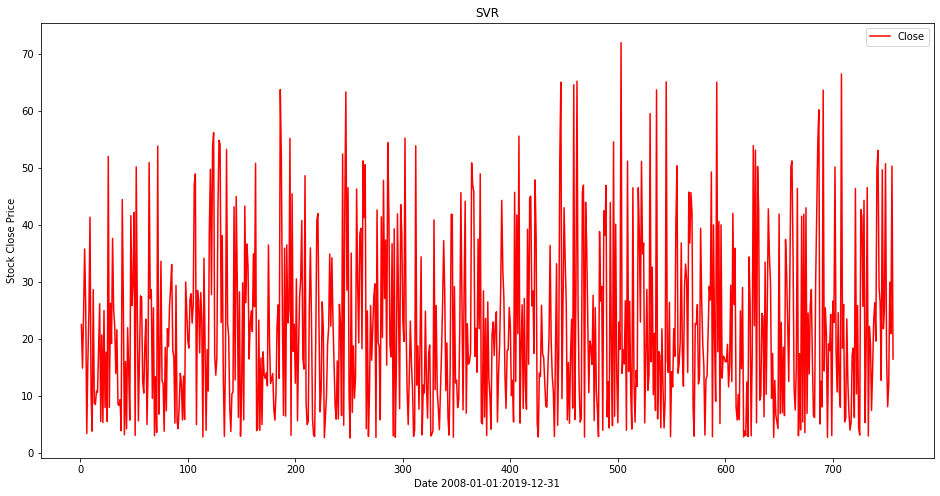

In [119]:
plt.figure(figsize=(16,8))
plt.title('SVR')
plt.plot(day_count[:756], y_test, color='red',label='Close')
# plt.plot(day_count[:756], lin_svr.predict(X_test), color='green', label='Linear Model')
# plt.plot(day_count[:756], rbf_svr.predict(X_test), color='blue', label='RBF Model')
# plt.plot(day_count[:756], poly_svr.predict(X_test), color='orange', label='Poly Model')
plt.xlabel('Date 2008-01-01:2019-12-31')
plt.ylabel('Stock Close Price')
plt.legend()
plt.show()